In [1]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

# Download data with yfinance
ticker = 'GOOG'
start_date = '2019-01-01'
end_date = '2024-10-18'

data = yf.download(ticker, start=start_date, end=end_date)

# Print the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  50.828499  52.616001  50.785500  52.292500  52.164394  30652000
2019-01-03  52.049999  52.848999  50.703499  50.803001  50.678543  36822000
2019-01-04  51.629501  53.542000  51.370899  53.535500  53.404346  41878000
2019-01-07  53.575001  53.700001  52.737999  53.419498  53.288631  39638000
2019-01-08  53.805500  54.228001  53.026501  53.813999  53.682163  35298000


In [3]:
returns = 100 * data.Close.pct_change().dropna()

In [4]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

Text(0.5, 1.0, 'Google Returns')

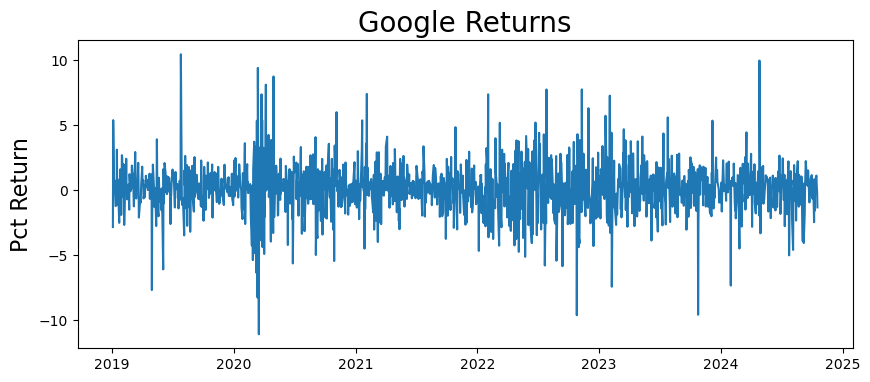

In [19]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Google Returns', fontsize=20)

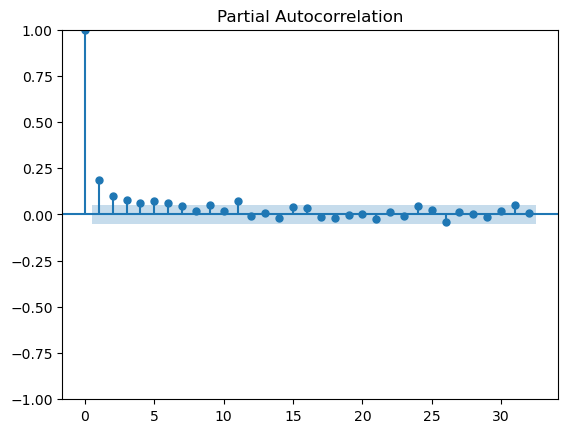

In [6]:
plot_pacf(returns**2)
plt.show()

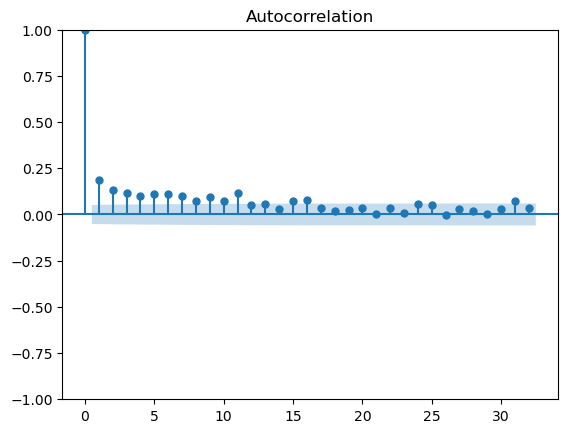

In [7]:
plot_acf(returns**2)
plt.show()

In [8]:
model = arch_model(returns, p=2, q=2)

In [9]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 34639478799.98887
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2451231.074152374
Iteration:      3,   Func. Count:     27,   Neg. LLF: 3709.4086144962894
Iteration:      4,   Func. Count:     36,   Neg. LLF: 3019.877956106113
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2972.167970577708
Iteration:      6,   Func. Count:     52,   Neg. LLF: 2971.455065261058
Iteration:      7,   Func. Count:     59,   Neg. LLF: 2971.253306977895
Iteration:      8,   Func. Count:     66,   Neg. LLF: 2971.237528866205
Iteration:      9,   Func. Count:     73,   Neg. LLF: 2971.236529747475
Iteration:     10,   Func. Count:     80,   Neg. LLF: 2971.2365217912584
Iteration:     11,   Func. Count:     87,   Neg. LLF: 2971.2365123611116
Iteration:     12,   Func. Count:     94,   Neg. LLF: 2971.236491897473
Iteration:     13,   Func. Count:    101,   Neg. LLF: 2971.2364882322418
Iteration:     14,   Func. Count:    107,   Neg. LLF: 2971.2

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2971.24
Distribution:                  Normal   AIC:                           5954.47
Method:            Maximum Likelihood   BIC:                           5986.18
                                        No. Observations:                 1458
Date:                Fri, Oct 25 2024   Df Residuals:                     1457
Time:                        11:49:11   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1396  5.003e-02      2.791  5.255e-03 [4.157e-02,  0.238]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.4294      0.265      1.622      0.105   [-8.953e-02,  0.948]
alpha[1]       0.1355  3.976e-02      3.408  6.534e-04    [5.759e-02,  0.213]
alpha[2]       0.0000  2.166e-02      0.000      1.000 [-4.246e-02,4.246e-02]
beta[1]        0.0000  6.297e-02      0.000      1.000      [ -0.123,  0.123]
beta[2]        0.7537  6.326e-02     11.914  9.951e-33      [  0.630,  0.878]
=============================================================================

Covariance estimator: robust
"""

In [16]:
rolling_predictions = []
test_size = 250

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=3)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [17]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-250:])

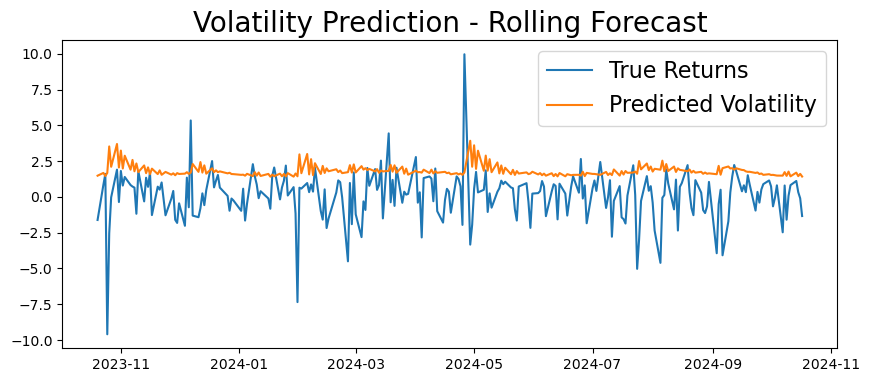

In [18]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-250:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)